# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [138]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [139]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head(5)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [140]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [141]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [142]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [18]:
#  4. Get the average fare per ride for each city type. 
fare_per_ride = total_fares/total_rides
fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [143]:
# 5. Get the average fare per driver for each city type. 
fare_per_driver = total_fares/total_drivers
fare_per_driver


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [144]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({'Total Rides': total_rides, 'Total Drivers': total_drivers, 'Total Fares': total_fares, 'Average fare per ride': fare_per_ride, 'Average fare per driver':fare_per_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average fare per ride,Average fare per driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [146]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [147]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map('${:,.2f}'.format)
pyber_summary_df["Average fare per ride"] = pyber_summary_df["Average fare per ride"].map('${:,.2f}'.format)
pyber_summary_df["Average fare per driver"] = pyber_summary_df["Average fare per driver"].map('${:,.2f}'.format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average fare per ride,Average fare per driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [148]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/19 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/19 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/19 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/19 19:22,44.94,4.256850e+12,4,Rural


In [149]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
new_df = pyber_data_df.groupby(["date","type"])[["fare"]].sum() #use double brackets to make a df (not series!)
new_df.head(5)

,,fare
date,type,
1/1/19 0:08,Urban,37.91
1/1/19 0:46,Suburban,47.74
1/1/19 12:32,Suburban,25.56
1/1/19 14:40,Urban,5.42
1/1/19 14:42,Urban,12.31


In [150]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
new_df = new_df.reset_index()
new_df



,date,type,fare
0,1/1/19 0:08,Urban,37.91
1,1/1/19 0:46,Suburban,47.74
2,1/1/19 12:32,Suburban,25.56
3,1/1/19 14:40,Urban,5.42
4,1/1/19 14:42,Urban,12.31
...,...,...,...
2359,5/8/19 1:54,Urban,32.69
2360,5/8/19 2:31,Urban,41.33
2361,5/8/19 4:20,Urban,21.99
2362,5/8/19 4:39,Urban,18.45


In [151]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
new_df_pivot = new_df.pivot(index='date', columns = 'type', values = 'fare')
new_df_pivot

type,Rural,Suburban,Urban
date,,,
1/1/19 0:08,NaN,NaN,37.91
1/1/19 0:46,NaN,47.74,NaN
1/1/19 12:32,NaN,25.56,NaN
1/1/19 14:40,NaN,NaN,5.42
1/1/19 14:42,NaN,NaN,12.31
...,...,...,...
5/8/19 1:54,NaN,NaN,32.69
5/8/19 2:31,NaN,NaN,41.33
5/8/19 4:20,NaN,NaN,21.99


In [152]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
new_df_pivot_loc = new_df_pivot.loc['1/1/19': '4/29/2019']
new_df_pivot_loc

type,Rural,Suburban,Urban
date,,,
1/1/19 0:08,NaN,NaN,37.91
1/1/19 0:46,NaN,47.74,NaN
1/1/19 12:32,NaN,25.56,NaN
1/1/19 14:40,NaN,NaN,5.42
1/1/19 14:42,NaN,NaN,12.31
...,...,...,...
4/29/19 6:08,NaN,17.99,NaN
4/29/19 6:57,NaN,NaN,23.99
4/29/19 7:09,NaN,34.77,NaN


In [153]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
new_df_pivot_loc.index = pd.to_datetime(new_df_pivot_loc.index)

In [154]:
# 7. Check that the datatype for the index is datetime using df.info()
new_df_pivot_loc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2079 entries, 2019-01-01 00:08:00 to 2019-04-29 07:50:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     107 non-null    float64
 1   Suburban  544 non-null    float64
 2   Urban     1430 non-null   float64
dtypes: float64(3)
memory usage: 65.0 KB


In [100]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
new_df_pivot_loc_weeksum = new_df_pivot_loc.resample("W").sum()
new_df_pivot_loc_weeksum

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


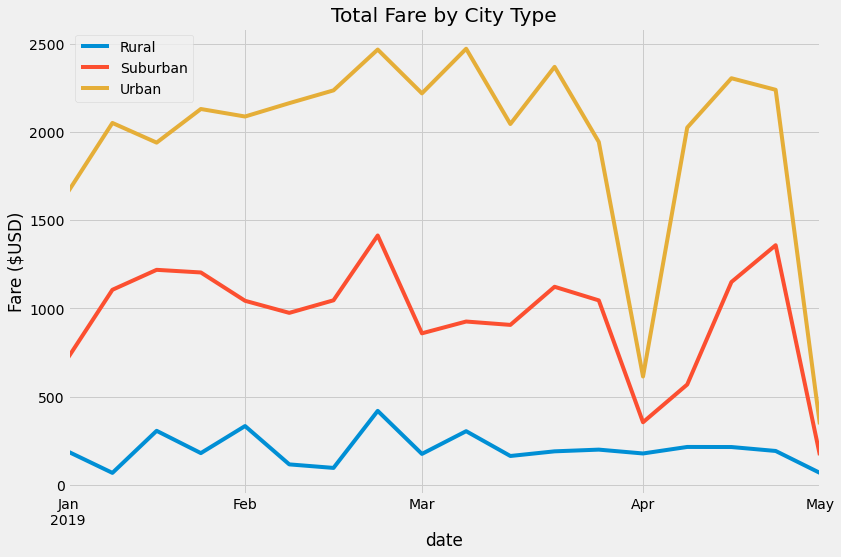

In [155]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(12, 8))#Change the size of the figure in pixels. Add this in the subplots() function.
new_df_pivot_loc_weeksum.plot(y='Rural', ax=ax, legend=True)
new_df_pivot_loc_weeksum.plot(y='Suburban', ax=ax, legend=True)
new_df_pivot_loc_weeksum.plot(y='Urban', ax=ax, legend=True)
ax.set_ylabel('Fare ($USD)')#Add a label to the y-axis.
ax.set_title("Total Fare by City Type")#Add a title.
ax.legend()#Add a legend.
plt.savefig("analysis/PyBer_fare_summary.png")#Saves the figure with the given extension.

